In [25]:
import torch

In [26]:
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad= True)

In [27]:
x

tensor(3.)

In [28]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [29]:
y.backward()

In [30]:
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor(3.)
tensor(1.)


In [31]:
import torchvision as tv

In [32]:
dataset_train = tv.datasets.MNIST(root='./data', train=True, transform=tv.transforms.ToTensor())
dataset_test = tv.datasets.MNIST(root='./data', train=False, transform=tv.transforms.ToTensor())

In [33]:
type(dataset_train)

torchvision.datasets.mnist.MNIST

In [34]:
print(dataset_train.data.shape)
print(dataset_train.targets.shape)

print(dataset_test.data.shape)
print(dataset_test.targets.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


In [35]:
import matplotlib.pyplot as plt

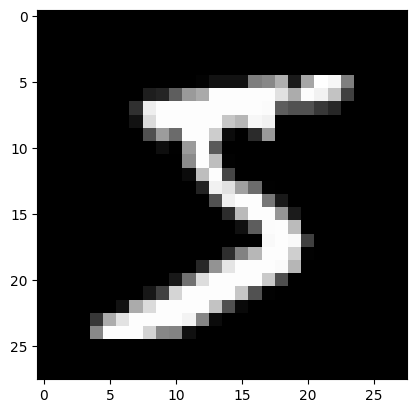

In [36]:
plt.imshow(dataset_train.data[0], cmap='gray')

In [37]:
from torch.utils.data import DataLoader, random_split

In [38]:
train_ds, val_ds = random_split(dataset_train, [50000, 10000])

In [39]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size, shuffle=True) 
# no need to do shuffle for val_dl

In [61]:
for images, labels in train_dl:
    print(labels)
    print(labels.shape)
    print(images.shape)
    break

tensor([3, 7, 6, 9, 5, 0, 3, 9, 2, 5, 5, 6, 4, 4, 2, 2, 9, 7, 9, 3, 9, 3, 9, 6,
        4, 6, 0, 8, 0, 5, 3, 8, 8, 7, 5, 7, 0, 2, 4, 6, 1, 7, 2, 6, 2, 3, 9, 6,
        7, 6, 0, 3, 0, 3, 6, 0, 1, 6, 1, 4, 1, 9, 6, 2, 6, 2, 4, 6, 6, 4, 0, 4,
        9, 9, 9, 7, 7, 5, 0, 6, 1, 3, 4, 6, 1, 9, 2, 6, 2, 6, 1, 2, 1, 1, 8, 6,
        7, 8, 3, 8, 4, 0, 9, 4, 6, 7, 8, 1, 1, 2, 4, 4, 9, 0, 2, 8, 6, 3, 4, 4,
        0, 4, 2, 3, 2, 6, 7, 1])
torch.Size([128])
torch.Size([128, 1, 28, 28])


In [59]:
type(train_dl)

torch.utils.data.dataloader.DataLoader

In [60]:
list(train_dl)

[[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          ...,
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,

In [41]:
import torch.nn as nn

In [42]:
class MnistModel(nn.Module):
    def __init__ (self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [43]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [44]:
print(model.linear.weight.shape, model.linear.bias.shape)
model.linear.weight

torch.Size([10, 784]) torch.Size([10])


Parameter containing:
tensor([[ 0.0052,  0.0120,  0.0341,  ..., -0.0089,  0.0228,  0.0119],
        [ 0.0005, -0.0025, -0.0184,  ..., -0.0024,  0.0244, -0.0274],
        [-0.0056,  0.0267,  0.0063,  ..., -0.0023,  0.0231, -0.0052],
        ...,
        [ 0.0054, -0.0276, -0.0343,  ...,  0.0019,  0.0159,  0.0015],
        [-0.0150, -0.0022, -0.0352,  ...,  0.0064, -0.0259,  0.0081],
        [-0.0114, -0.0194, -0.0228,  ..., -0.0099,  0.0230, -0.0125]],
       requires_grad=True)

In [45]:
list(model.linear.parameters())

[Parameter containing:
 tensor([[ 0.0052,  0.0120,  0.0341,  ..., -0.0089,  0.0228,  0.0119],
         [ 0.0005, -0.0025, -0.0184,  ..., -0.0024,  0.0244, -0.0274],
         [-0.0056,  0.0267,  0.0063,  ..., -0.0023,  0.0231, -0.0052],
         ...,
         [ 0.0054, -0.0276, -0.0343,  ...,  0.0019,  0.0159,  0.0015],
         [-0.0150, -0.0022, -0.0352,  ...,  0.0064, -0.0259,  0.0081],
         [-0.0114, -0.0194, -0.0228,  ..., -0.0099,  0.0230, -0.0125]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0003,  0.0065, -0.0176,  0.0219, -0.0186,  0.0328, -0.0075,  0.0323,
         -0.0313, -0.0250], requires_grad=True)]

In [62]:
for images, lables in train_dl:
    output = model(images)
    break

In [64]:
print('output.shape:', output.shape)
output

output.shape: torch.Size([128, 10])


tensor([[ 0.1451, -0.0559, -0.0797,  ...,  0.0705,  0.1360,  0.1732],
        [-0.1189, -0.1281, -0.1382,  ...,  0.1938, -0.1141,  0.0789],
        [ 0.3848,  0.1426, -0.2277,  ...,  0.0225, -0.5103, -0.2149],
        ...,
        [ 0.0761, -0.0996, -0.1785,  ..., -0.0670, -0.2077,  0.1264],
        [-0.0562,  0.0262, -0.0865,  ...,  0.0441,  0.3064,  0.0309],
        [ 0.1098, -0.0937, -0.1291,  ..., -0.3038,  0.0614, -0.0248]],
       grad_fn=<AddmmBackward0>)

In [66]:
output[0].data

tensor([ 0.1451, -0.0559, -0.0797, -0.0482,  0.0911,  0.2580, -0.2851,  0.0705,
         0.1360,  0.1732])

In [67]:
import torch.nn.functional as F

In [68]:
probs = F.softmax(output, dim=1)

In [72]:
probs.data

tensor([[0.1098, 0.0898, 0.0877,  ..., 0.1019, 0.1088, 0.1130],
        [0.0931, 0.0922, 0.0913,  ..., 0.1272, 0.0935, 0.1134],
        [0.1568, 0.1231, 0.0850,  ..., 0.1092, 0.0641, 0.0861],
        ...,
        [0.1090, 0.0914, 0.0845,  ..., 0.0944, 0.0820, 0.1146],
        [0.0931, 0.1011, 0.0903,  ..., 0.1029, 0.1338, 0.1016],
        [0.1141, 0.0931, 0.0899,  ..., 0.0755, 0.1087, 0.0998]])

In [75]:
torch.sum(probs[0]).item()

0.9999999403953552

In [81]:
max_probs, pred = torch.max(probs, dim=1)
print(pred)
print(max_probs)

tensor([5, 7, 0, 7, 9, 0, 7, 5, 7, 9, 1, 7, 8, 0, 0, 3, 5, 9, 5, 7, 7, 0, 7, 4,
        6, 0, 5, 0, 8, 7, 6, 6, 8, 8, 6, 0, 0, 1, 7, 0, 0, 0, 0, 8, 9, 5, 0, 8,
        6, 8, 0, 5, 0, 0, 9, 8, 8, 0, 0, 8, 1, 0, 7, 0, 0, 0, 8, 7, 0, 7, 0, 0,
        5, 1, 6, 8, 6, 0, 8, 5, 6, 0, 6, 0, 0, 0, 5, 9, 9, 7, 0, 0, 5, 0, 3, 5,
        6, 0, 6, 5, 7, 0, 0, 0, 0, 6, 1, 6, 5, 9, 5, 5, 5, 1, 0, 5, 6, 6, 6, 0,
        5, 6, 9, 9, 0, 6, 8, 3])
tensor([0.1230, 0.1272, 0.1568, 0.1369, 0.1185, 0.1481, 0.1370, 0.1224, 0.1460,
        0.1229, 0.1357, 0.1458, 0.1158, 0.1175, 0.1319, 0.1208, 0.1417, 0.1201,
        0.1446, 0.1201, 0.1213, 0.1279, 0.1386, 0.1103, 0.1216, 0.1131, 0.1308,
        0.1236, 0.1574, 0.1261, 0.1573, 0.1272, 0.1156, 0.1103, 0.1242, 0.1294,
        0.1221, 0.1208, 0.1333, 0.1324, 0.1609, 0.1249, 0.1530, 0.1245, 0.1269,
        0.1383, 0.1201, 0.1292, 0.1152, 0.1170, 0.1433, 0.1336, 0.1485, 0.1572,
        0.1508, 0.1199, 0.1147, 0.1330, 0.1609, 0.1396, 0.1255, 0.1231, 0.1335,
       

In [82]:
labels

tensor([3, 7, 6, 9, 5, 0, 3, 9, 2, 5, 5, 6, 4, 4, 2, 2, 9, 7, 9, 3, 9, 3, 9, 6,
        4, 6, 0, 8, 0, 5, 3, 8, 8, 7, 5, 7, 0, 2, 4, 6, 1, 7, 2, 6, 2, 3, 9, 6,
        7, 6, 0, 3, 0, 3, 6, 0, 1, 6, 1, 4, 1, 9, 6, 2, 6, 2, 4, 6, 6, 4, 0, 4,
        9, 9, 9, 7, 7, 5, 0, 6, 1, 3, 4, 6, 1, 9, 2, 6, 2, 6, 1, 2, 1, 1, 8, 6,
        7, 8, 3, 8, 4, 0, 9, 4, 6, 7, 8, 1, 1, 2, 4, 4, 9, 0, 2, 8, 6, 3, 4, 4,
        0, 4, 2, 3, 2, 6, 7, 1])

In [84]:
pred == labels

tensor([False,  True, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False,  True, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False])

In [85]:
torch.sum(pred == labels)

tensor(11)

In [86]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [90]:
accuracy(output, labels).item()

0.0859375

In [91]:
11/128

0.0859375

In [92]:
loss_fn = F.cross_entropy

In [93]:
loss = loss_fn(output, labels)

In [95]:
loss.item()

2.3518505096435547

In [99]:
torch.exp(-loss).item()
# = .095 which is the avg predicted probability of the correct label. which is bad
# so higher the value, the better the model.

0.09519284218549728

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

In [102]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=28*28, out_features=10)

    def forward(self, xb):
        xb = xb.reshape(-1, 28*28)
        out = self.linear(xb)
        return out

model = MnistModel()

In [106]:
def fit(epochs, lr, model, train_dl, val_dl, opt_fn=torch.optim.SGD, loss_fn=F.cross_entropy, val_test=10):
    
    optimizer = opt_fn(model.parameters(), lr)
    result = []

    # trainig step
    for epoch in range(epochs):
        for images, labels in train_dl:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        if epoch % val_test == 0:
            # validation step
            # epoch loss and epoch acc
            for images, labels in val_dl:
                outputs = model(images)
                loss = loss_fn(outputs, labels)
                acc = accuracy(outputs, labels)
            
            result.append({'epoch' : epoch, 'loss' : loss.item(), 'acc' : acc.item()})
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item()}, Accuracy: {acc.item()}')

    return result


In [108]:
history1 = fit(5, 0.001, model, train_dl, val_dl, val_test=1)

Epoch [0/5], Loss: 0.4656360149383545, Accuracy: 0.875
Epoch [1/5], Loss: 0.7966557741165161, Accuracy: 0.75
Epoch [2/5], Loss: 0.9168591499328613, Accuracy: 0.75
Epoch [3/5], Loss: 0.6197484135627747, Accuracy: 0.875
Epoch [4/5], Loss: 0.29506969451904297, Accuracy: 1.0


In [110]:
history2 = fit(5, 0.01, model, train_dl, val_dl, val_test=1)

Epoch [0/5], Loss: 0.345583438873291, Accuracy: 0.9375
Epoch [1/5], Loss: 0.5153435468673706, Accuracy: 0.875
Epoch [2/5], Loss: 0.5113409161567688, Accuracy: 0.875
Epoch [3/5], Loss: 0.8285215497016907, Accuracy: 0.6875
Epoch [4/5], Loss: 1.0171681642532349, Accuracy: 0.75
